In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_1=pd.read_csv("C://Users//hp//Downloads//takehome_users.csv",encoding="latin-1",parse_dates= True)
file_2=pd.read_csv("C://Users//hp//Downloads//takehome_user_engagement.csv")

In [4]:
file_1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
file_2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
import datetime
file_2.time_stamp = pd.to_datetime(file_2.time_stamp)

In [7]:
def login_days(df, days=7, logins=3):
    from datetime import timedelta
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    passed_days = df['date'].diff(periods=logins-1)
    return any(passed_days <= timedelta(days=days))

In [8]:
adopted = file_2.groupby('user_id').apply(login_days)
adopted.name = 'adopted_user'

In [9]:
print('There were {} adopted users out of {} users'.format(
    sum(adopted), len(adopted)))

There were 1656 adopted users out of 8823 users


In [10]:
file_1 = file_1.set_index(['object_id'])
file_1.index.name = 'user_id'

In [11]:
file_1 = pd.concat([file_1, adopted], axis=1, join='inner')
file_1['adopted_user'] = file_1['adopted_user'].astype(int)

In [12]:
file_1.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
user_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [13]:
file_1.creation_time = pd.to_datetime(file_1.creation_time)
file_1['last_session_creation_time'] = file_1['last_session_creation_time'].map(lambda data: 
                                    datetime.datetime.fromtimestamp(int(data)).strftime('%Y-%m-%d %H:%M:%S'),
                                                                              na_action='ignore')

In [14]:
file_1['last_session_creation_time'] = pd.to_datetime(file_1['last_session_creation_time'])


In [15]:
file_1.invited_by_user_id = file_1.invited_by_user_id.fillna(0)

In [16]:
file_1['time_span_of_the_account'] = file_1['last_session_creation_time'] - file_1['creation_time']
file_1['time_span_of_the_account'] = file_1['time_span_of_the_account'].dt.days
file_1 = file_1.drop(['creation_time', 'last_session_creation_time'], axis=1)
file_1.head()

,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,time_span_of_the_account
user_id,,,,,,,,,
1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,0,0
2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,1,136
3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,0,0
4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,0,1
5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,0,5


In [17]:
file_1 = file_1.drop(['name','email'],axis=1)

In [18]:
from sklearn.preprocessing import LabelEncoder

labl_enc = LabelEncoder()
creation_labels = labl_enc.fit_transform(file_1['creation_source'])
file_1.creation_source = creation_labels

org_id_labels = labl_enc.fit_transform(file_1['org_id'])
file_1.org_id = org_id_labels

invited_by_user_id_labels = labl_enc.fit_transform(file_1['invited_by_user_id'])
file_1.org_id = invited_by_user_id_labels

In [19]:
file_1.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,time_span_of_the_account
user_id,,,,,,,
1,0,1,0,2024,10803.0,0,0
2,1,0,0,48,316.0,1,136
3,1,0,0,264,1525.0,0,0
4,0,0,0,967,5151.0,0,1
5,0,0,0,984,5240.0,0,5


In [20]:
from sklearn.model_selection import train_test_split

#set up data by seperating out the labels, then split for cross validation
data = file_1.drop('adopted_user', axis=1)
labels = file_1.adopted_user

X_train, y_train, X_test, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier

#train and test classifier
rand_for_classifier = RandomForestClassifier(class_weight='balanced_subsample')

rand_for_classifier.fit(X_train, X_test)

rand_for_classifier.score(y_train, y_test)

0.9491758241758241

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# classification report  
y_pred = rand_for_classifier.predict(y_train)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2355
           1       0.88      0.85      0.87       557

    accuracy                           0.95      2912
   macro avg       0.92      0.91      0.92      2912
weighted avg       0.95      0.95      0.95      2912



In [23]:
#confusion matrix
conf_matx= confusion_matrix(y_test,y_pred)

print('confusion matrix:')

print(conf_matx)

confusion matrix:
[[2288   67]
 [  81  476]]


In [24]:
feature_importance = pd.DataFrame()
feature_importance['coef'] = rand_for_classifier.feature_importances_
feature_importance = feature_importance.set_index(data.columns)
feature_importance.coef.nlargest(10)

time_span_of_the_account      0.921446
invited_by_user_id            0.030394
org_id                        0.029773
creation_source               0.010007
opted_in_to_mailing_list      0.005135
enabled_for_marketing_drip    0.003245
Name: coef, dtype: float64

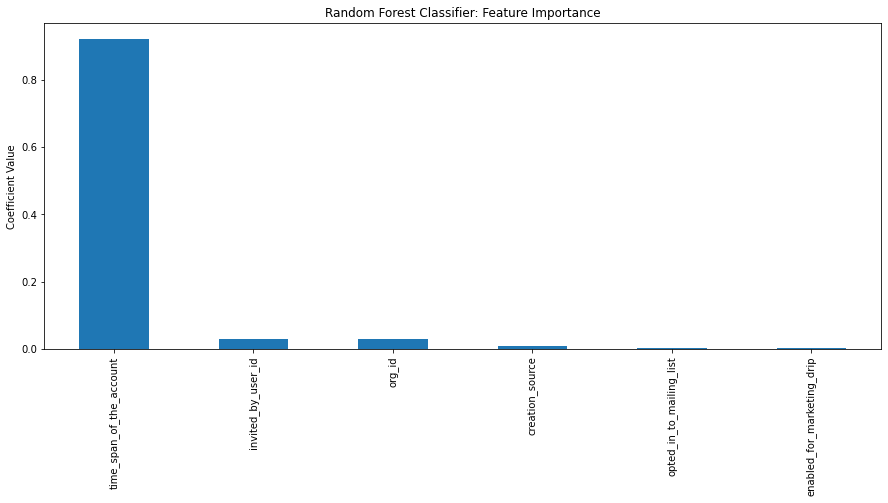

In [31]:
#plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
(feature_importance['coef']).nlargest(10).plot(kind='bar', x=feature_importance.index)
plt.title('Random Forest Classifier: Feature Importance')
plt.ylabel('Coefficient Value')
plt.show()